<div align="right">
<table style="width:50%">
  <tr>
    <th>Hazırlayan</th>
    <th>Versiyon</th> 
    <th>Tarih</th> 
    <th>Dil</th>
  </tr>
  <tr>
    <td>dataFLOYD</td>
    <td>v1.00</td> 
    <td>23 Eyl 2018</td>
    <td>TR </td>
  </tr>
</table>
</div>

# k-Means kümeleme algoritması

Bu yazımızda en temel "denetimsiz öğrenme" algoritması olan k-Means algoritmasını inceliyoruz. Ayrıca siz sevgili okuyucularımıza bu algoritmanın **6 satır kod** kullanarak nasıl uygulanacağını
göstereceğiz.

## Denetimsiz Öğrenme (Unsupervised Learning) hakkında

Makine öğrenmesi algoritmaları temelde iki ana başlık altında incelenir. 
* Denetimli öğrenme (Supervised Learning)
* Denetimsiz öğrenme (Unsupervised Learning)
<br><br>*Not: Bu konuda çok daha ayrıntılı taksonomiler mevcut, burada sadece giriş seviyesinde konuyu ele aldığımız için iki sınıfa ayırdık. Bakmak isterseniz aşağıya birkaç referans ekliyorum:* 
<br>[1]<a href="http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html</a>
<br>[2]<a href="https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/">https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/</a>


<div class="alert alert-success">
  <strong>Denetimli öğrenme</strong> problemlerinde elimizde verinin sınıfı bellidir, yani veri etiketlenmiştir. <br>
  <strong>Denetimsiz öğrenme</strong> probleminde elimizdeki verinin sınıfı belli değildir. Bu tip algoritmalar veriyi baz alarak kendi kendine öğrenmeye ve veriyi etiketlemeye çalışırlar.Denetimsiz öğrenmenin çok daha bakir ve zor konu olduğunu söylemek yanlış olmaz.
</div>



Denetimsiz öğrenme algoritmaları arasında en önemli yeri **kümeleme algoritmaları** tutar. Adından da anlaşılacağı gibi bu algoritmalarda bütün haldeki veriyi kümelere ayırmak ve her bir kümeye bir etiket atamak esastır.

Şimdi gelelim bugünün konusu olan k-Means'e: k-Means basitçe anlatmak gerekirse bir kümeleme algoritmasıdır. Kümeleme yaparken küme merkezlerine olan yakınlıkları göz önünde bulundurur. İteratif bir algoritma olan k-Means her iterasyonda sınıf merkezlerini ve örneklerin bunlara olan aidiyetlerini günceller. 

## k-Means nasıl çalışır?

k-Means algoritması adından da anlaşılabileceği üzere k adet "means" (ortalama) hesaplamaktadır. Bu ortalamalar aslında sınıf merkezlerini ifade etmektedir.   

### k-Means sözde kodu (pseudo code) 

Sözde kod (pseudo code) kavramını belki duymayanlarınız olabilir. **Sözde kod** bir algoritmayı veya programı ifade etmek için hazırlanmış basitleştirilmiş komutlar bütünüdür. Bu komutlar herhangi bir programlama diline ait olmak zorunda değildir. 

k-Means algoritması için sözde kodu yazalım ve sonrasında inceleyelim. Bu algoritmaya k parametresi yani kaç tane küme olacağı girdi olarak sağlanmaktadır.

**k-Means "sözde kodu"**
1. *Kümelerin (Cluster) merkezlerini ilklendir. (Genellikle rasgele bir şekilde ilklendirme yapılır)*
1. *Veri setindeki her bir örneğin en yakın olduğu küme merkezi bul (Yakınlık fonksiyonu olarak "euclidian distance" kullanılabilir.)*
    1. *Her örneğin sınıfını en yakın olduğu küme merkezinin sınıfına eşitle*
1. *Kümelerin merkezlerini yeniden hesapla*
1. Yakınsama durumu oluşuncaya kadar veya belirli sayıda iterasyon tamamlanıncaya kadar 2. ve 3. adımı tekrarlar 
    1. Yakınsama durumu: *Artık örneklerin sınıfları değişmiyorsa bu durum gerçekleşmiştir.*

### Önce biraz veri lazım! 

Birazdan sıfırdan bir k-Means algoritmasının nasıl yazıldığını göstereceğim. Öncelikle oynayabileceğimiz bir veri seti yaratalım. Bu veri setini yaratmak için scikit-learn paketinden "blobs" alt paketini kullanacağız. 

In [18]:
%matplotlib notebook
# Scikit learn kütüphanesinden make_blobs  
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=200, # veri setinde kaç örnek olcak
                n_features = 2, # veri setinin 2 boyutlu olmasını istiyoruz
                 centers = 4, # deneme amaçlı k=4 olsun
                 random_state=42, # tekrarlanabilir olması açısından
                )

In [19]:
import matplotlib.pyplot as plt
# Seaborn dark theme tercihimizdir :)
import seaborn as sns
sns.set_style("darkgrid")

<IPython.core.display.Javascript object>


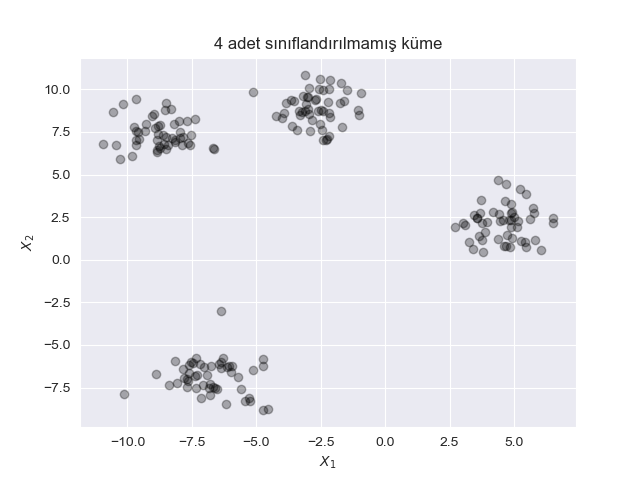

In [20]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c="k",alpha=0.3);
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.title("4 adet sınıflandırılmamış küme");

Yapay olarak hazırladığımız bu veri setinde 4 adet kümeyi gözle seçebilmek mümkün. Peki k-Means algoritması bu veri setindeki kümeleri bulabilecek mi?? Hep birlikte görelim.

### k-Means algoritmasını yazalım!

Sözde kodun üzerinden giderek adım adım algoritmayı analiz edelim ve kodlarını parça parça yazalım. Sonrasında bunu bir fonksiyon haline dönüştürebiliriz.

-------------------

**Birinci adım**<br>
1. *Kümelerin (Cluster) merkezlerini ilklendir. (Genellikle rasgele bir şekilde ilklendirme yapılır)*

Bu adım bize rasgele k adet nokta seçmemizi söylüyor. Bunu efektif bir şekilde nasıl yapabiliriz? "Python"un standart kütüphanesinde *random.sample* diye bir metod mevcut belki bunu kullanabiliriz, deneyelim? Bu arada k değerinin de 4 olduğunu belirtelim.

Birkaç teknik açıklama yapayım. *random.sample* fonksiyonu *X* değişkenini liste olarak alıyor bu sebeple girdi olarak X'i listeye çevirmemiz lazım.  

In [21]:
import random
k = 4
# yeniden çalıştırınca aynı sonuçları versin
random.seed(42)
# 4 adet rasgele değişken seçiyoruz
merkezler = random.sample(list(X),k)

<IPython.core.display.Javascript object>


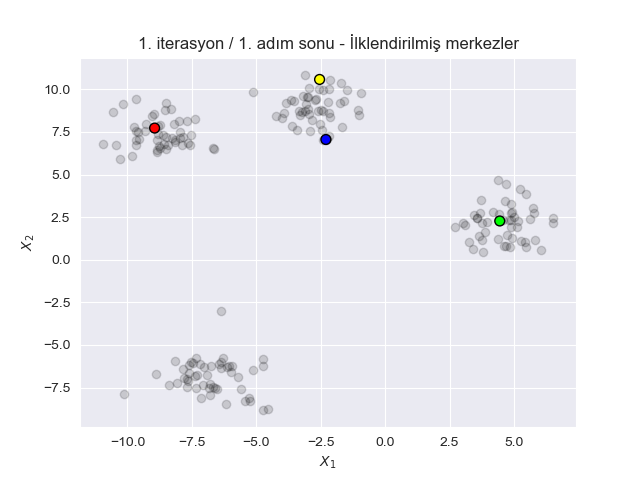

In [22]:
# colormap kullanmak için
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['red','blue','lime','yellow'])
kume_id  = [0,1,2,3]

plt.figure()
plt.scatter(X[:,0],X[:,1],c="k",alpha=0.15);
# Seçilen noktaları çizdiriyoruz
plt.scatter([x[0] for x in merkezler],[x[1] for x in merkezler],
           cmap=cm_bright,
           c=kume_id,alpha=1,s=200,marker=".",edgecolor="k")
# Eksen etiketlemeleri
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.title("1. iterasyon / 1. adım sonu - İlklendirilmiş merkezler");

İlk merkezlerin rasgele olarak seçildikleri noktaları yukarıdaki şekilden görebiliriz. Merkezlere sırasıyla 0,1,2 ve 3 etiketlerini verdik. 

------------------

**İkinci Adım**
2. *Veri setindeki her bir örneğin en yakın olduğu küme merkezi bul (Yakınlık fonksiyonu olarak "euclidian distance" kullanılabilir.)*<br>
    A. *Her örneğin sınıfını en yakın olduğu küme merkezinin sınıfına eşitle*

Burada her bir örneğin her bir merkeze olan mesafelerini hesaplamamız gerekiyor. Bunu bir *for* döngüsü içinde yapmak mümkün. Fakat bu şekilde yaparsak bu bize çok fazla bir işlem yükü olarak geri döner. İşlem yükünü azaltmak için vektör operasyonlarından faydalanmamız gerekiyor. *"scipy"* kütüphanesindeki bu iş için optimize edilmiş  *cdist* fonksiyonunu kullanalım 

In [23]:
from scipy.spatial.distance import cdist
mesafeler = cdist(X, merkezler)

Mesafeler değişkenine baktığımızda *örnek sayısı (çarpı) k* kadar bir matris olduğunu görüyoruz. Bu matrisin her bir satırındaki en küçük değeri bulmamız gerekiyor. Bunu da yine işlem gereksinimini azaltmak için *numpy* kütüphanesindeki *argmin* fonksiyonunu kullanarak yapacağız. İşlemi satır bazında yapacağımız için *axis=1* parametresini de eklemeyi unutmuyoruz.

In [24]:
import numpy as np
kumeler=np.argmin(mesafeler,axis=1)

Bu işlemi de tamamladıktan sonra elimizde örneklerin atandığı sınıflar bulunmakta. İsterseniz bu aşamada nasıl bir atama yapıldığını görselleştirelim.

<IPython.core.display.Javascript object>


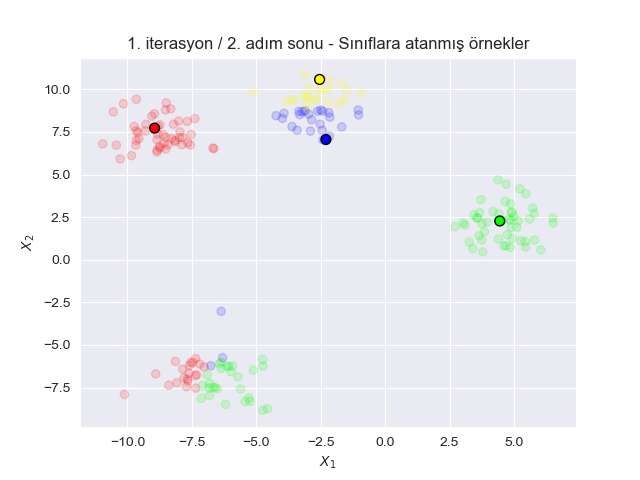

In [25]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=kumeler,alpha=0.15,cmap=cm_bright);
# Seçilen noktaları çizdiriyoruz
plt.scatter([x[0] for x in merkezler],[x[1] for x in merkezler],
           cmap=cm_bright,
           c=kume_id,alpha=1,s=200,marker=".",edgecolor="k")
# Eksen etiketlemeleri
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.title("1. iterasyon / 2. adım sonu - Sınıflara atanmış örnekler");

Yazılarımı takip ediyorsanız görselleştirmeyi çok sevdiğimi anlamışsınızdır :) Yukarıdaki grafik gerçekten güzel bir görüntü sergiliyor değil mi? Daha da önemlisi merkezlerin en yakın oldukları örnekleri de çok rahatlıkla inceleyebiliyoruz.

-----------------------

**Üçüncü adım**
3. *Kümelerin merkezlerini yeniden hesapla*

Geldik son adıma. Bu adımda merkezleri yeniden hesaplamamız gerekiyor. Küme sayısı az olduğu için burada ufak bir *for* yardımı alabiliriz sanırım.  

In [26]:
yeni_merkezler = []
for kume in kume_id:
    yeni_merkezler.append(X[kumeler==kume].mean(0))

Yeni oluştuduğumuz merkezlerin nereye kaydığına bakalım.

<IPython.core.display.Javascript object>


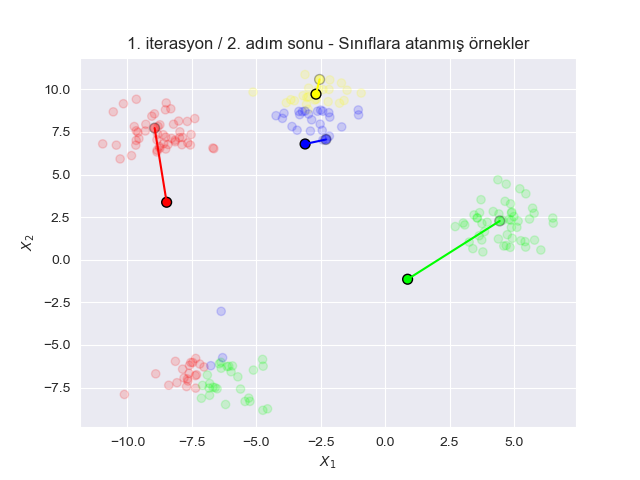

In [27]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=kumeler,alpha=0.15,cmap=cm_bright);
# Seçilen noktaları çizdiriyoruz
plt.scatter([x[0] for x in merkezler],[x[1] for x in merkezler],
           cmap=cm_bright,
           c=kume_id,alpha=0.3,s=200,marker=".",edgecolor="k")

plt.scatter([x[0] for x in yeni_merkezler],[x[1] for x in yeni_merkezler],
           cmap=cm_bright,
           c=kume_id,alpha=1,s=200,marker=".",edgecolor="k")

for kume in kume_id:
    plt.plot([merkezler[kume][0],yeni_merkezler[kume][0]],
            [merkezler[kume][1],yeni_merkezler[kume][1]],c=cm_bright.colors[kume])

# Eksen etiketlemeleri
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.title("1. iterasyon / 2. adım sonu - Sınıflara atanmış örnekler");

Merkezlerin hareketini grafik üzerinden görmek mümkün. Ben de merak ediyorum doğrusu sonuna kadar gittiğimizde nasıl bir yol izleyecekler.

Üçüncü adımı bitirmeden *for* döngüsünü daha güzel hale getirmemiz mümkün. Bunu *list comprehension* kullanarak yapabilmemiz mümkün.

In [28]:
yeni_merkezler = np.array([X[kumeler==kume].mean(0) for kume in kume_id])

Aynı işi yapıyoruz fakat tek satır olması daha "artistik" duruyor değil mi? :)

### Hepsini birleştirelim

Artık adımlarını tek tek analiz ettiğimiz algoritmayı birleştirip bir fonksiyon haline getirmek kaldı. Biraz basit olması amacıyla bu fonksiyona da algoritmanın kaç adım koşacağına dair bir parametre ekledik mi işlem tamamdır.

------------------

<div class="alert alert-danger">
  <strong>k-Means fonksiyonu</strong>
</div>


In [29]:
def kmeans(X, k=4, max_iterasyon = 300):
    # 1. adım
    merkezler = np.array(random.sample(list(X),k))  
    for iter in range(max_iterasyon):
        # 2. adım
        kumeler=np.argmin(cdist(X, merkezler),axis=1) 
        # 3. adım
        merkezler = np.array([X[kumeler==kume].mean(0) for kume in kume_id])
    return kumeler,merkezler

--------

k-means algoritmasını çağıralım

In [30]:
kumeler, merkezler = kmeans(X)

<IPython.core.display.Javascript object>


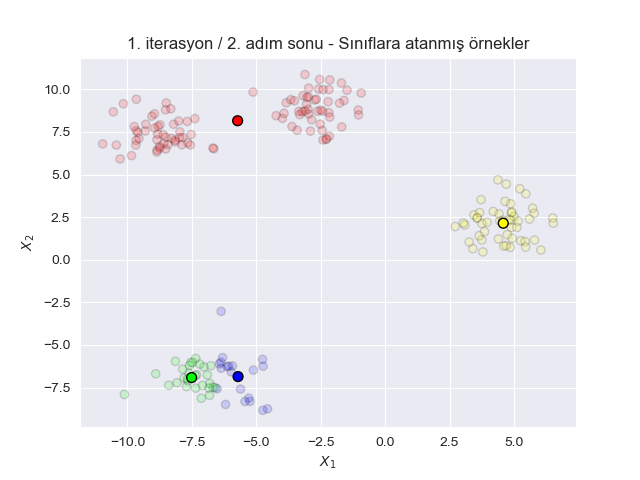

In [31]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=kumeler,alpha=0.15,cmap=cm_bright,edgecolor="k");
# Seçilen noktaları çizdiriyoruz
plt.scatter([x[0] for x in merkezler],[x[1] for x in merkezler],
           cmap=cm_bright,
           c=kume_id,s=200,marker=".",edgecolor="k")


# Eksen etiketlemeleri
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.title("1. iterasyon / 2. adım sonu - Sınıflara atanmış örnekler");

<div class="alert alert-info">
  <strong>Vay be 6 satır kod ile k-Means yazabildik! Harika!</strong> (def ve return kısmını saymazsak 4 satır :))
</div>


*Ref: Erik Linder-Norén'e NapkinML kütüphanesi için teşekkürler*

## Biraz eğlenelim artık

Eğlence dediysem eller havaya yapmayacağız tabi :) Algoritmanın iterasyonları sırasında merkezlerin nasıl değiştiğini görselleştireceğiz.

In [32]:
def kmeans_fun(X, k=4, max_iterasyon = 300):
    # yeniden çalıştırınca aynı sonuçları versin
    random.seed(42)
    
    # 1. adım
    merkezler_array = []
    merkezler = np.array(random.sample(list(X),k))
    merkezler_array.append(merkezler)
    for iter in range(max_iterasyon):
        # 2. adım
        kumeler=np.argmin(cdist(X, merkezler),axis=1) 
        # 3. adım
        merkezler = np.array([X[kumeler==kume].mean(0) for kume in kume_id])
        merkezler_array.append(merkezler)
    return kumeler,merkezler_array

In [33]:
kumeler, merkezler_array = kmeans_fun(X)

<IPython.core.display.Javascript object>


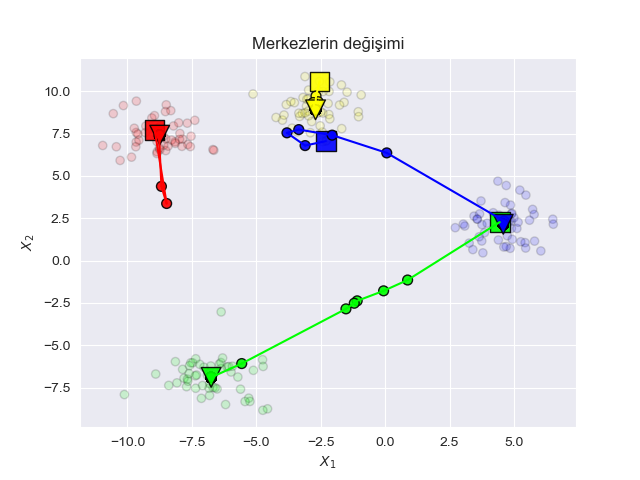

In [34]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=kumeler,alpha=0.15,cmap=cm_bright,edgecolor="k");

# merkezleri çizdiriyoruz
for i in range(len(merkezler_array)):
    
    if i==0:
        current_marker = "s"
    elif i==(len(merkezler_array)-1):
        current_marker = "v"
    else:
        current_marker = "."
    plt.scatter([x[0] for x in merkezler_array[i]],[x[1] for x in merkezler_array[i]],
               cmap=cm_bright,
               c=kume_id,s=200,marker=current_marker,edgecolor="k",alpha=0.9)

# çizgiler
for i in range(len(merkezler_array)-1):
    for kume in kume_id:
        plt.plot([merkezler_array[i][kume][0],merkezler_array[i+1][kume][0]],
                [merkezler_array[i][kume][1],merkezler_array[i+1][kume][1]],c=cm_bright.colors[kume])

# Eksen etiketlemeleri
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.title("Merkezlerin değişimi");

Grafikte *"kare"* ile başlayıp *"ters üçgen"* ile sona eren izleri görebilirsiniz. Biz algoritmada 300 iterasyon kullandık fakat 10 iterasyonla da bu iş olur gibi görünüyor grafiğe bakınca. Bana inanmıyorsanız *max_iterasyon"* parametresini 10 yapıp deneyin. Ben denedim çalışıyor. Bu da ilk ödevim olsun sizlere :)

Bir başka algoritmada görüşünceye kadar kendinize iyi bakın!